<a href="https://colab.research.google.com/github/JakubPac/kurs_ml/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import sklearn

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
np.set_printoptions(precision = 4, suppress = True)

In [3]:
import plotly.express as px

In [4]:
np.random.seed(42)

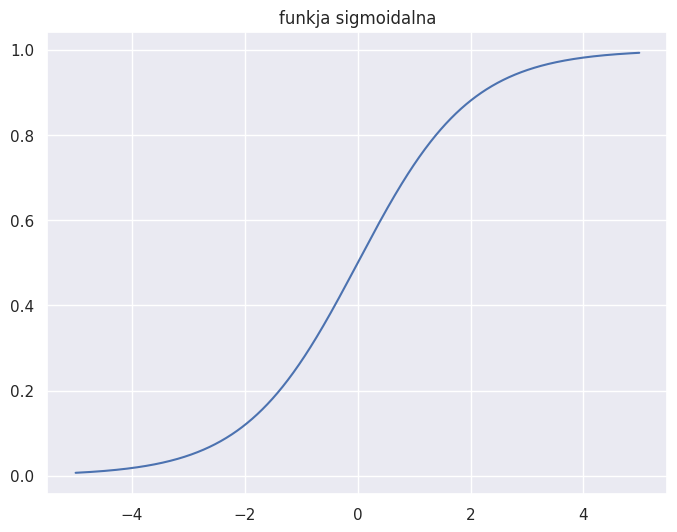

In [5]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

x = np.arange(-5, 5, 0.01)

y = sigmoid(x)

plt.figure(figsize = (8,6))
plt.plot(x, y, label = 'sigmoid')
plt.title('funkja sigmoidalna')
plt.show()

In [6]:
from sklearn.datasets import load_breast_cancer

raw_data = load_breast_cancer()
raw_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
raw_data.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 569\n\n:Number of Attributes: 30 numeric, predictive attributes and the class\n\n:Attribute Information:\n    - radius (mean of distances from center to points on the perimeter)\n    - texture (standard deviation of gray-scale values)\n    - perimeter\n    - area\n    - smoothness (local variation in radius lengths)\n    - compactness (perimeter^2 / area - 1.0)\n    - concavity (severity of concave portions of the contour)\n    - concave points (number of concave portions of the contour)\n    - symmetry\n    - fractal dimension ("coastline approximation" - 1)\n\n    The mean, standard error, and "worst" or largest (mean of the three\n    worst/largest values) of these features were computed for each image,\n    resulting in 30 features.  For instance, field 0 is Mean Radius, field\n    10 is Radius SE, field 

In [8]:
all_data = raw_data.copy()

data = all_data['data']
target =all_data['target']

print(data.shape)
print(target.shape)

(569, 30)
(569,)


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.25)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(426, 30)
(143, 30)
(426,)
(143,)


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [12]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[ 0.5416, -0.3118,  0.5157, ...,  0.1069, -0.1493, -0.121 ],
       [ 0.1907, -0.5652,  0.1018, ..., -0.5213, -0.5759, -0.8373],
       [ 0.6791,  1.9786,  0.6454, ...,  0.4098, -1.0664, -0.3029],
       ...,
       [-0.5025, -0.4419, -0.4759, ..., -0.2464, -0.1061,  1.5053],
       [-0.438 , -0.5173, -0.4768, ..., -0.2394,  0.6145, -0.5666],
       [ 0.8447,  0.6062,  0.7792, ...,  1.2586,  0.5282, -0.4375]])

In [13]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

Predykcja

In [14]:
y_pred = classifier.predict(X_test)
y_pred[:10]

array([1, 1, 0, 1, 1, 1, 0, 0, 1, 1])

In [15]:
y_prob = classifier.predict_proba(X_test)
y_prob[:10]

array([[0.0196, 0.9804],
       [0.    , 1.    ],
       [0.9998, 0.0002],
       [0.0004, 0.9996],
       [0.0001, 0.9999],
       [0.0984, 0.9016],
       [1.    , 0.    ],
       [1.    , 0.    ],
       [0.1664, 0.8336],
       [0.    , 1.    ]])

Ocena modelu

Accuracy score = 0.972027972027972


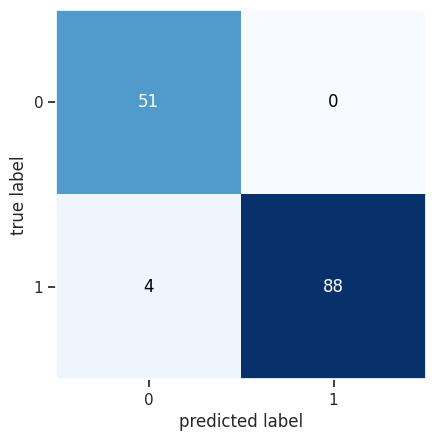

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cm)

print(f'Accuracy score = {accuracy_score(y_test, y_pred)}')

In [18]:
import plotly.figure_factory as ff
def plot_confusion_matrix(cm):
    #klasyfikacja binarna
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns = ['pred_0', 'pred_1'], index = ['true_1', 'true_0'])
    fig = ff.create_annotated_heatmap(z = cm.values, x = list(cm.columns), y = list(cm.index),
                                      colorscale = 'ice',showscale = True, reversescale = True)
    fig.update_layout(width = 500, height = 500, title = 'Confusion matrix', font_size = 16)
    fig.show()
plot_confusion_matrix(cm)



In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        51
           1       1.00      0.96      0.98        92

    accuracy                           0.97       143
   macro avg       0.96      0.98      0.97       143
weighted avg       0.97      0.97      0.97       143

